In [2]:
# использование библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #для визуализации и графиков
#загрузка данных из файла (.csv)
df = pd.read_csv('S02-hw-dataset.csv')
#вывод

#№1 первичныйй осмотр
print(df.head())#для первых строк
print(df.info())#для информации о столбцах и типах
print(df.describe())#базовые описательные статистики

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000

In [6]:
#№2 использование пропусков, дубликатов и использование базового контроля качества
print("Доля пропусков в каждом столбце:")
print(df.isna().sum())#подсчет доли пропусков в каждом столбце
print("Количество дубликатов:")
print(df.duplicated().sum())#подсчет на дубликаты
negative_sales = df[df["age"] < 0]#нахождение отрицательных значений в полях (где их не должно быть)
print("Подозрительные случаи:")
print(negative_sales)#вывод значений

Доля пропусков в каждом столбце:
user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64
Количество дубликатов:
1
Подозрительные случаи:
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []


In [13]:
#№3 базовый EDA: группировки, агрегаты и частоты
print("Частоты для стран:")
country_counts = df['country'].value_counts()#подсчет частоты для переменной 'country'
print(country_counts)
country_group = df.groupby('country').agg({'age': 'mean', 'purchases': 'mean', 'revenue': 'mean'})#функция'mean' используется для подсчета среднего значения (функция была взята ресурсов интернета); для её выполнения используется .agg
print("Группировка по странам и нахождение средних значений для age, purchases, revenue:")
print(country_group)
#Для 3-ей части возьму 'age', так как используются числа (легче исправлять при пробе)
age_bins = [0, 18, 35, 55, 100]
age_labels = ['0-18', '19-35', '36-55', '56 and above']#присвоение значений интервалам от .bin
df["age_group"] = pd.cut(df['age'], bins=age_bins, labels=age_labels)  # создание нового столбца, в котором каждому значению из 'age' присваивается значение из интервала от age_bins с age_labels

Частоты для стран:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
Группировка по странам и нахождение средних значений для age, purchases, revenue:
               age  purchases      revenue
country                                   
CN       24.000000   4.500000  1054.000000
DE       34.600000   6.500000  1445.500000
FR       46.250000   4.250000   675.916667
RU       30.076923   4.769231   790.076923
US       36.714286   4.625000   557.375000


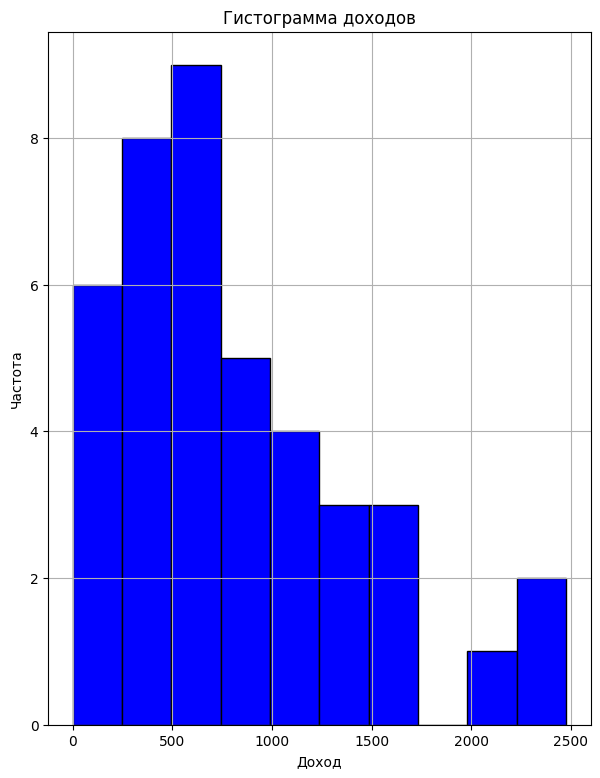

In [15]:
#Гистограмма
plt.figure(figsize = (7, 9))#создание специальной фигуры для графика
# Построение гистограммы для столбца 'revenue' (доход), установка количества корзин (bins = 10),
# Установление цвета столбцов гистограммы (color = 'blue') и цвета границ (edgecolor = 'black')
plt.hist(df['revenue'], bins = 10, color = 'blue', edgecolor = 'black')
plt.title('Гистограмма доходов')#создание заголовка
plt.xlabel('Доход')#создание OX
plt.ylabel('Частота')#создание OY
plt.grid(True)#отображение сетки на графике
plt.show()#отображение графика

C:\Users\PC\AppData\Local\Temp\ipykernel_15316\1446524250.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=countries, patch_artist=True,# создание боксплота с использованием списков групп и значений на оси координат


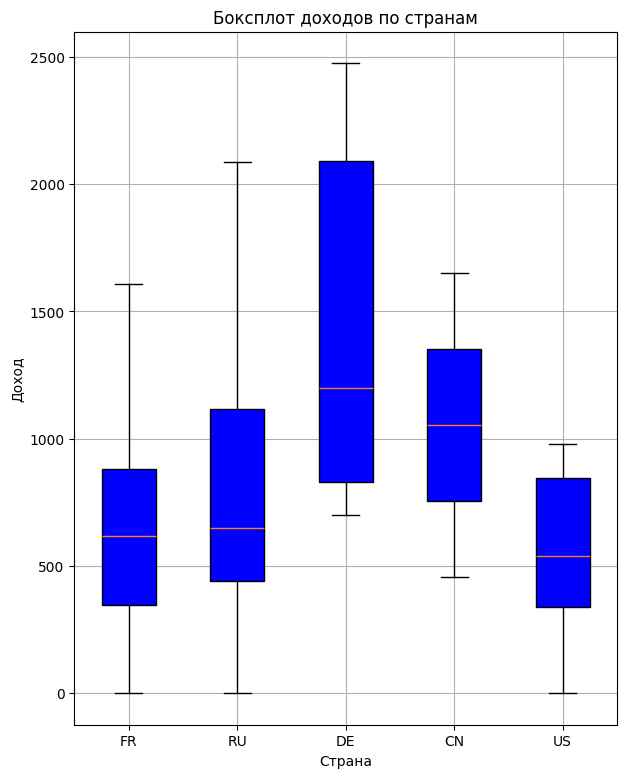

In [17]:
#Боксплот
countries = df['country'].unique()# создание списка уникальных стран
data_to_plot = [df[df['country'] == country]['revenue'] for country in countries]# создание списка значений для каждой страны
plt.figure(figsize=(7, 9))# создание фигуры с заданными размерами (ещё раз)
plt.boxplot(data_to_plot, labels=countries, patch_artist=True,# создание боксплота с использованием списков групп и значений на оси координат
            boxprops=dict(facecolor='blue', color='black'),# заполнение цветом
            flierprops=dict(markerfacecolor='red', marker='o', markersize=5))# управление выводом боксплота и построение боксплота для доходов по странам (уже использовалась)
plt.title('Боксплот доходов по странам')# добавление заголовка
plt.xlabel('Страна')# добавление OX
plt.ylabel('Доход')# добавление OY
plt.grid(True)# построение сетки для осей координат 
plt.show()# отображение графика

График сохранен.


C:\Users\PC\AppData\Local\Temp\ipykernel_15316\2173542150.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=countries, patch_artist=True,# создание боксплота с использованием списков групп и значений на оси координат


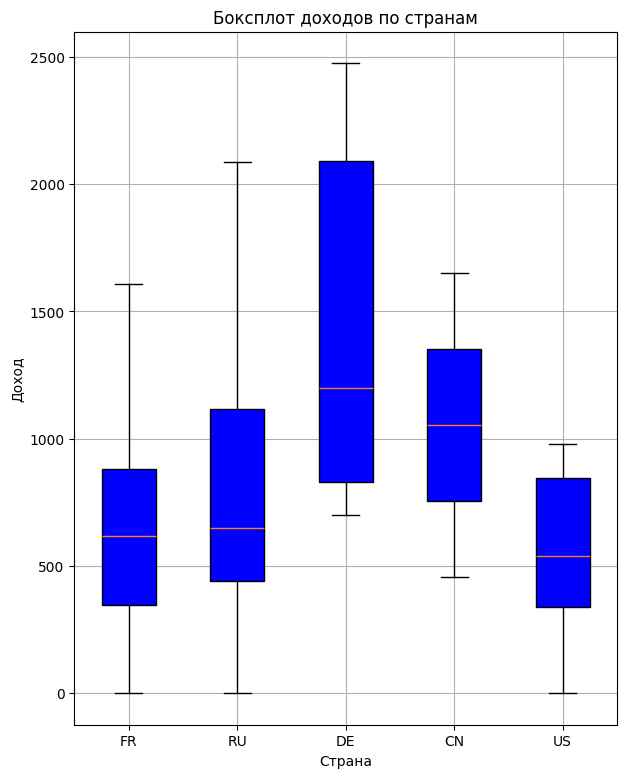

In [24]:
# Выполнение всех действий из предыдущего построения графика
countries = df['country'].unique()# создание списка уникальных стран
data_to_plot = [df[df['country'] == country]['revenue'] for country in countries]# создание списка значений для каждой страны
plt.figure(figsize=(7, 9))# создание фигуры с заданными размерами (ещё раз)
plt.boxplot(data_to_plot, labels=countries, patch_artist=True,# создание боксплота с использованием списков групп и значений на оси координат
            boxprops=dict(facecolor='blue', color='black'),# заполнение цветом
            flierprops=dict(markerfacecolor='red', marker='o', markersize=5))# управление выводом боксплота и построение боксплота для доходов по странам (уже использовалась)
plt.title('Боксплот доходов по странам')# добавление заголовка
plt.xlabel('Страна')# добавление OX
plt.ylabel('Доход')# добавление OY
plt.grid(True)# построение сетки для осей координат 
# сохранение графика в папку 'homeworks/HW02/figures/'
plt.savefig('C://Users/PC/DPOIvK/homeworks/HW02/figures/boxplot.png')  # сохранение графика в формате изображения (получилось выполнить работу только при написании полного пути)
print("График сохранен.")
plt.show()# отображение графика
# была проведена проверка(визуальная). В папке появилось изображение.

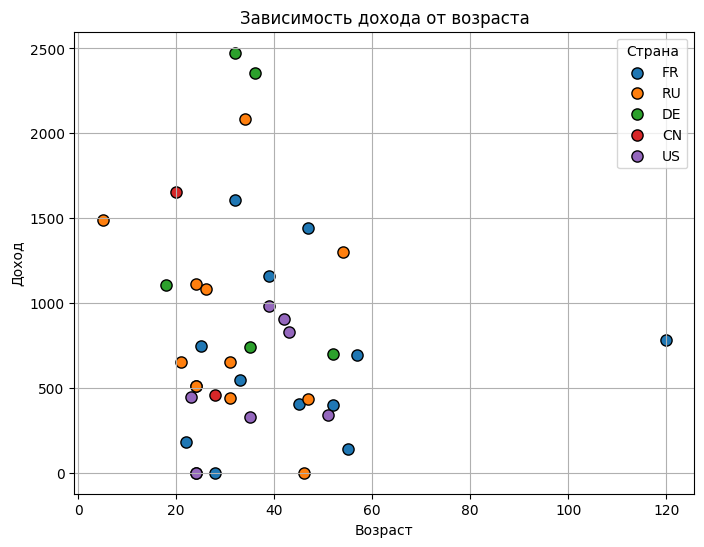

In [25]:
#Диаграмма рассеяния
# Выполнения предыдущих операций
plt.figure(figsize=(8, 6))# создание специальной фигуры для графика
# создание диаграммы рассеяния с Matplotlib
for country in df['country'].unique():#создание списка уникальных стран
    country_data = df[df['country'] == country]#фильтрация данных по "country"
    plt.scatter(country_data['age'], country_data['revenue'], label=country, s=65, edgecolor='black')#непосредственное построение графика
plt.title('Зависимость дохода от возраста')#добавление заголовка
plt.xlabel('Возраст')#подпись OX
plt.ylabel('Доход')#подпись OY
plt.grid(True)#создание сетки для осей
plt.legend(title='Страна')
plt.show()#отображение графика